In [5]:
pip install torch torchvision torchaudio

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/d0/db/5d9cbfbc7968d79c5c09a0bc0bc3735da079f2fd07cc10498a62b320a480/torch-2.5.1-cp311-none-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchvision from https://files.pythonhosted.org/packages/28/57/4d7ad90be612f5ac6c4bdafcb0ff13e818e14a340a88c8ca00d9ed8c2dad/torchvision-0.20.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for torchaudio from https://files.pythonhosted.org/packages/6a/97/1780e3dd8733da30ff1051b8cbd8006e4824b76028558a58c31e790c09cd/torchaudio-2.5.1-cp311-cp311-macosx_11_0_arm64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/26/9f/ad63fc0248c5379346306f8668cda6e2e2e9c95e01216d2b8ffd9ff037d0/typing_extensions-4.12.2-py3-none-any.whl.metadata
  Obtaining dependency information for sympy==1.13.1 from https://files.pythonhosted.org/packages/b2/fe/81695a1aa33

Using time_window: 5
Train X shape: (12, 5, 1)
Train y shape: (12,)
Validation X shape: (3, 5, 1)
Validation y shape: (3,)
Epoch 1/50


/Users/zeba/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - loss: 0.3555 - val_loss: 0.4325
Epoch 2/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3430 - val_loss: 0.4129
Epoch 3/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3287 - val_loss: 0.3936
Epoch 4/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.3154 - val_loss: 0.3740
Epoch 5/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step - loss: 0.2956 - val_loss: 0.3539
Epoch 6/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2839 - val_loss: 0.3329
Epoch 7/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2682 - val_loss: 0.3109
Epoch 8/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2438 - val_loss: 0.2876
Epoch 9/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step - loss: 0.2301 - val_loss: 0.2630
Epoch 10/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.2127 - val_loss: 0.2374
Epoch 11/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1889 - val_loss: 0.2108
Epoch 12/50
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - loss: 0.1686 - val_loss: 0.1839
Epoch 13/50
1/

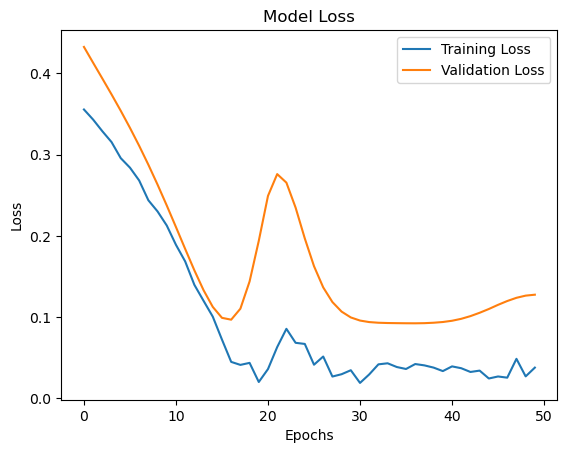

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 132ms/step


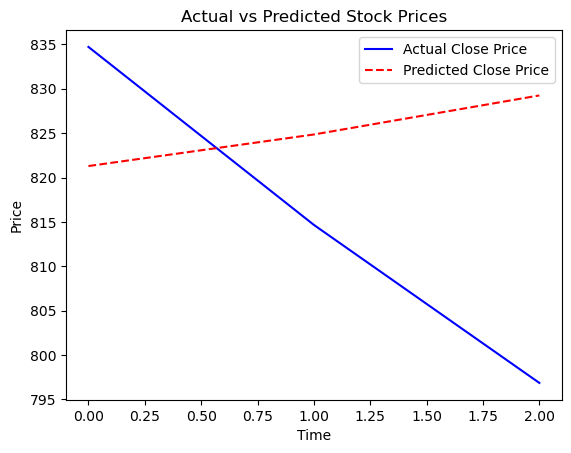

In [43]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout

# Step 1: Load and Preprocess Data
file_path = "/Users/zeba/Downloads/Google_Stock_Price_Test.csv.csv"
data = pd.read_csv(file_path)

# Extract relevant column (assumes 'Close' is the second column)
closing_prices = data.iloc[:, 1:2].values

# Normalize the data
scaler = MinMaxScaler(feature_range=(0, 1))
normalized_prices = scaler.fit_transform(closing_prices)

# Step 2: Create Data Windows
def create_data_windows(data, window=60):
    if len(data) <= window:
        raise ValueError(f"Window size ({window}) is too large for the dataset size ({len(data)}). Adjust the time_window.")
    X, y = [], []
    for i in range(window, len(data)):
        X.append(data[i - window:i, 0])
        y.append(data[i, 0])
    return np.array(X), np.array(y)

# Parameters
dataset_size = len(normalized_prices)
time_window = min(5, dataset_size - 1)  # Set a smaller window size if the dataset is small
print(f"Using time_window: {time_window}")

input_features, target_values = create_data_windows(normalized_prices, time_window)

# Reshape for LSTM input
input_features = input_features.reshape((input_features.shape[0], input_features.shape[1], 1))

# Split into training and validation datasets
split_index = int(len(input_features) * 0.8)
train_X, val_X = input_features[:split_index], input_features[split_index:]
train_y, val_y = target_values[:split_index], target_values[split_index:]

# Print dataset shapes for debugging
print("Train X shape:", train_X.shape)
print("Train y shape:", train_y.shape)
print("Validation X shape:", val_X.shape)
print("Validation y shape:", val_y.shape)

# Step 3: Build LSTM Model
model = Sequential([
    LSTM(units=50, return_sequences=True, input_shape=(train_X.shape[1], 1)),
    Dropout(0.2),
    LSTM(units=50, return_sequences=True),
    Dropout(0.2),
    LSTM(units=50),
    Dropout(0.2),
    Dense(units=1)
])

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Step 4: Train the Model
epochs = 50
batch_size = min(32, len(train_X))  # Adjust batch size to fit the dataset
if len(train_X) == 0 or len(train_y) == 0:
    raise ValueError("Training data is empty. Please check the dataset and parameters.")
history = model.fit(
    train_X, train_y,
    validation_data=(val_X, val_y),
    epochs=epochs,
    batch_size=batch_size
)

# Step 5: Visualize Training and Validation Loss
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Step 6: Make Predictions
predicted_prices = model.predict(val_X)
predicted_prices = scaler.inverse_transform(predicted_prices.reshape(-1, 1))
actual_prices = scaler.inverse_transform(val_y.reshape(-1, 1))

# Step 7: Plot Results
plt.plot(actual_prices, color='blue', label='Actual Close Price')
plt.plot(predicted_prices, color='red', linestyle='dashed', label='Predicted Close Price')
plt.title('Actual vs Predicted Stock Prices')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()
